In [4]:
library(data.table)
library(dplyr)
library(tidyr)
library(MLmetrics)

In [5]:
dt=fread("bulk_consumption_with_temp.csv")

In [6]:
dt

Date,Hour,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7
2017-01-01,0,25409.31,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,1,24166.14,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,2,22652.02,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,3,21578.05,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,4,21018.20,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,5,20953.17,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,6,23254.49,-15.88,4.18,0.89,-18.96,-14.77,-10.68,2.16
2017-01-01,7,22993.17,-14.86,4.33,0.92,-16.66,-14.29,-10.03,1.82
2017-01-01,8,22994.16,-13.83,4.48,0.95,-14.36,-13.82,-9.38,1.48
2017-01-01,9,24053.48,-12.81,4.63,0.98,-12.06,-13.34,-8.73,1.14


In [7]:
dt_new=fread("C:/Users/bahad/GitHub/360project/all_features_df.csv")
droped=fread("C:/Users/bahad/GitHub/360project/droped_all_features_df.csv")

In [8]:
dt$Date=as.Date(dt$Date)
str(dt)

Classes 'data.table' and 'data.frame':	35232 obs. of  10 variables:
 $ Date       : Date, format: "2017-01-01" "2017-01-01" ...
 $ Hour       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Consumption: num  25409 24166 22652 21578 21018 ...
 $ T_1        : num  -15.9 -15.9 -15.9 -15.9 -15.9 ...
 $ T_2        : num  4.18 4.18 4.18 4.18 4.18 4.18 4.18 4.33 4.48 4.63 ...
 $ T_3        : num  0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.92 0.95 0.98 ...
 $ T_4        : num  -19 -19 -19 -19 -19 ...
 $ T_5        : num  -14.8 -14.8 -14.8 -14.8 -14.8 ...
 $ T_6        : num  -10.7 -10.7 -10.7 -10.7 -10.7 ...
 $ T_7        : num  2.16 2.16 2.16 2.16 2.16 2.16 2.16 1.82 1.48 1.14 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [9]:
str(dt_new)

Classes 'data.table' and 'data.frame':	1484 obs. of  22 variables:
 $ date                    : chr  "2017-01-01" "2017-01-02" "2017-01-03" "2017-01-04" ...
 $ Consumption             : num  623400 751053 784007 796582 787800 ...
 $ T_1                     : num  -10.125 -6.708 -11.472 -5.925 0.408 ...
 $ T_2                     : num  6.17 4.8 6.83 6.28 6.84 ...
 $ T_3                     : num  2.81 4.01 6.86 9.92 12.56 ...
 $ T_4                     : num  -13.22 -7.81 -12.38 -9.13 -1.21 ...
 $ T_5                     : num  -10.74 -10.29 -8.82 -4.37 1.28 ...
 $ T_6                     : num  -8.6 -8.62 -7.56 -6.56 -1.94 ...
 $ T_7                     : num  2.69 4.61 6.76 8.18 9.24 ...
 $ reduced_temp            : num  -11.83 -7.656 -7.598 -0.709 10.211 ...
 $ holiday_val(as_factor)  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ weekday(as_factor)      : num  7 1 2 3 4 5 6 7 1 2 ...
 $ lock_down(as_factor)    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ covid_severity          : num  0 0 0 0 0 0 0 0 0 0 

In [10]:
old <- c("holiday_val(as_factor)", "weekday(as_factor)", "lock_down(as_factor)")
new <- c("holiday_val", "weekday", "lock_down")

setnames(dt_new, old, new, skip_absent = TRUE)

In [11]:
dt_new[lock_down==1,lock_down:=0]

In [12]:
dt_new$date=as.Date(dt_new$date)
dt_new$holiday_val=as.factor(dt_new$holiday_val)
dt_new$weekday=as.factor(dt_new$weekday)
dt_new$lock_down=as.factor(dt_new$lock_down)
str(dt_new)

Classes 'data.table' and 'data.frame':	1484 obs. of  22 variables:
 $ date                    : Date, format: "2017-01-01" "2017-01-02" ...
 $ Consumption             : num  623400 751053 784007 796582 787800 ...
 $ T_1                     : num  -10.125 -6.708 -11.472 -5.925 0.408 ...
 $ T_2                     : num  6.17 4.8 6.83 6.28 6.84 ...
 $ T_3                     : num  2.81 4.01 6.86 9.92 12.56 ...
 $ T_4                     : num  -13.22 -7.81 -12.38 -9.13 -1.21 ...
 $ T_5                     : num  -10.74 -10.29 -8.82 -4.37 1.28 ...
 $ T_6                     : num  -8.6 -8.62 -7.56 -6.56 -1.94 ...
 $ T_7                     : num  2.69 4.61 6.76 8.18 9.24 ...
 $ reduced_temp            : num  -11.83 -7.656 -7.598 -0.709 10.211 ...
 $ holiday_val             : Factor w/ 8 levels "0","1","2","3",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ weekday                 : Factor w/ 7 levels "1","2","3","4",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ lock_down               : Factor w/ 2 levels "0","2": 1 1 

# Shift in the features

In [13]:
dt_new[,T_1:=shift(T_1,type="lag",n=2)]
dt_new[,T_2:=shift(T_2,type="lag",n=2)]
dt_new[,T_3:=shift(T_3,type="lag",n=2)]
dt_new[,T_4:=shift(T_4,type="lag",n=2)]
dt_new[,T_5:=shift(T_5,type="lag",n=2)]
dt_new[,T_6:=shift(T_6,type="lag",n=2)]
dt_new[,T_7:=shift(T_7,type="lag",n=2)]
dt_new[,reduced_temp:=shift(reduced_temp,type="lag",n=2)]
dt_new[,covid_severity:=shift(covid_severity,type="lag",n=2)]
dt_new[,sunlight_time_minutes:=shift(sunlight_time_minutes,type="lag",n=2)]

In [14]:
dt_new

date,Consumption,T_1,T_2,T_3,T_4,T_5,T_6,T_7,reduced_temp,...,lock_down,covid_severity,sunlight_time_minutes,production_capacity_rate,price_of_electricity,laborforce,unemployment,export,import,di
2017-01-01,623400.3,NA,NA,NA,NA,NA,NA,NA,NA,...,0,NA,NA,77,317.1,51.5,13,12101,15336,241
2017-01-02,751052.6,NA,NA,NA,NA,NA,NA,NA,NA,...,0,NA,NA,77,317.1,51.5,13,12101,15336,241
2017-01-03,784007.4,-10.125416667,6.165833,2.8083333,-13.2162500,-10.74208333,-8.5983333,2.6862500,-11.8303797,...,0,0,558,77,317.1,51.5,13,12101,15336,241
2017-01-04,796581.9,-6.708333333,4.796250,4.0062500,-7.8112500,-10.28666667,-8.6200000,4.6125000,-7.6558338,...,0,0,558,77,317.1,51.5,13,12101,15336,241
2017-01-05,787799.5,-11.472083333,6.831250,6.8558333,-12.3754167,-8.82333333,-7.5604167,6.7570833,-7.5980702,...,0,0,559,77,317.1,51.5,13,12101,15336,241
2017-01-06,765935.5,-5.925000000,6.281667,9.9183333,-9.1350000,-4.36875000,-6.5570833,8.1754167,-0.7089871,...,0,0,560,77,317.1,51.5,13,12101,15336,241
2017-01-07,732640.5,0.407916667,6.839583,12.5591667,-1.2079167,1.27625000,-1.9379167,9.2437500,10.2108282,...,0,0,561,77,317.1,51.5,13,12101,15336,241
2017-01-08,681312.4,0.625833333,9.244583,11.3558333,-0.1429167,2.12833333,0.6370833,7.8641667,11.9315103,...,0,0,562,77,317.1,51.5,13,12101,15336,241
2017-01-09,784143.6,-0.889583333,7.689583,-0.4420833,-1.1491667,-3.34250000,-0.8983333,-2.7604167,-0.6995870,...,0,0,563,77,317.1,51.5,13,12101,15336,241
2017-01-10,799766.9,-3.681250000,9.231667,-1.2300000,-6.0775000,-10.17500000,-5.0129167,-3.3462500,-7.7259978,...,0,0,564,77,317.1,51.5,13,12101,15336,241


# PCA

In [15]:
# form_pca <-prcomp(dt_daily[,c(3,4,5,6,7,8,9)], center = TRUE,scale. = TRUE)
# form_pca
# summary(form_pca)

In [16]:
# dt_daily=mutate(dt_daily, reduced_temp= 0.3794502 * T_1 + 0.3748089 * T_2 + 0.3782977 * T_3 + 0.3800144 * T_4 + 0.3790882 * T_5 + 0.3803995 * T_6 + 0.3736363 * T_7)

In [17]:
# tail(dt_daily)

In [18]:
# write.csv(dt_daily,"Daily_values_with_reduced_temperature.csv",row.names=FALSE)

### Performance Function

In [19]:
perf_dt=function(type,actual,forecast){
    name=type
    n=length(actual)
    error=actual-forecast
    mean=mean(actual)
    sd=sd(actual)
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=sqrt(sum(error^2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    l=data.frame(name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE)
    return(l)
}

# Linear Regression Daily 

In [20]:
str(dt_new)

Classes 'data.table' and 'data.frame':	1484 obs. of  22 variables:
 $ date                    : Date, format: "2017-01-01" "2017-01-02" ...
 $ Consumption             : num  623400 751053 784007 796582 787800 ...
 $ T_1                     : num  NA NA -10.13 -6.71 -11.47 ...
 $ T_2                     : num  NA NA 6.17 4.8 6.83 ...
 $ T_3                     : num  NA NA 2.81 4.01 6.86 ...
 $ T_4                     : num  NA NA -13.22 -7.81 -12.38 ...
 $ T_5                     : num  NA NA -10.74 -10.29 -8.82 ...
 $ T_6                     : num  NA NA -8.6 -8.62 -7.56 ...
 $ T_7                     : num  NA NA 2.69 4.61 6.76 ...
 $ reduced_temp            : num  NA NA -11.83 -7.66 -7.6 ...
 $ holiday_val             : Factor w/ 8 levels "0","1","2","3",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ weekday                 : Factor w/ 7 levels "1","2","3","4",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ lock_down               : Factor w/ 2 levels "0","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ covid_severity          : nu

In [21]:
dt_new[, day_2:=shift(Consumption,type="lag",n=2)]
dt_new[, day_7:=shift(Consumption,type="lag",n=7)]

In [22]:
train=filter(dt,Date<"2020-12-01")
test=filter(dt,Date>="2020-12-01")

In [23]:
train_daily=filter(dt_new,date<"2020-12-01")
test_daily=filter(dt_new,date>="2020-12-01", date<="2021-01-07")

## Daily Linear Regression

In [24]:
fit_daily=lm(Consumption~.-date,data=train_daily)
summary(fit_daily)


Call:
lm(formula = Consumption ~ . - date, data = train_daily)

Residuals:
    Min      1Q  Median      3Q     Max 
-168033  -15302   -1808   12928  160598 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.742e+04  6.835e+04  -0.401 0.688347    
T_1                       1.426e+03  6.107e+02   2.335 0.019700 *  
T_2                      -1.506e+03  4.784e+02  -3.149 0.001675 ** 
T_3                      -3.665e+02  6.710e+02  -0.546 0.585032    
T_4                      -8.818e+02  6.641e+02  -1.328 0.184471    
T_5                      -1.665e+03  6.613e+02  -2.518 0.011926 *  
T_6                       1.979e+03  7.778e+02   2.544 0.011055 *  
T_7                       1.805e+03  5.170e+02   3.491 0.000497 ***
reduced_temp                     NA         NA      NA       NA    
holiday_val1             -1.648e+05  1.544e+04 -10.675  < 2e-16 ***
holiday_val2             -6.782e+04  5

In [25]:
fit_daily_step=step(fit_daily)
summary(fit_daily_step)

Start:  AIC=28408.46
Consumption ~ (date + T_1 + T_2 + T_3 + T_4 + T_5 + T_6 + T_7 + 
    reduced_temp + holiday_val + weekday + lock_down + covid_severity + 
    sunlight_time_minutes + production_capacity_rate + price_of_electricity + 
    laborforce + unemployment + export + import + di + day_2 + 
    day_7) - date


Step:  AIC=28408.46
Consumption ~ T_1 + T_2 + T_3 + T_4 + T_5 + T_6 + T_7 + holiday_val + 
    weekday + lock_down + covid_severity + sunlight_time_minutes + 
    production_capacity_rate + price_of_electricity + laborforce + 
    unemployment + export + import + di + day_2 + day_7

                           Df  Sum of Sq        RSS   AIC
- sunlight_time_minutes     1 1.2351e+08 9.5568e+11 28407
- T_3                       1 2.0960e+08 9.5577e+11 28407
- production_capacity_rate  1 5.1375e+08 9.5607e+11 28407
- T_4                       1 1.2387e+09 9.5680e+11 28408
- unemployment              1 1.2751e+09 9.5683e+11 28408
<none>                                   9.555


Call:
lm(formula = Consumption ~ T_1 + T_2 + T_4 + T_5 + T_6 + T_7 + 
    holiday_val + weekday + lock_down + covid_severity + price_of_electricity + 
    laborforce + unemployment + export + import + di + day_2 + 
    day_7, data = train_daily)

Residuals:
    Min      1Q  Median      3Q     Max 
-167696  -15372   -2036   12731  160470 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.015e+04  6.146e+04  -0.328 0.743038    
T_1                   1.313e+03  5.721e+02   2.295 0.021900 *  
T_2                  -1.457e+03  4.735e+02  -3.078 0.002126 ** 
T_4                  -1.001e+03  6.400e+02  -1.565 0.117883    
T_5                  -1.780e+03  6.140e+02  -2.899 0.003805 ** 
T_6                   2.132e+03  7.593e+02   2.807 0.005068 ** 
T_7                   1.636e+03  4.102e+02   3.987 7.04e-05 ***
holiday_val1         -1.647e+05  1.540e+04 -10.693  < 2e-16 ***
holiday_val2         -6.778e+04  5.542e+03 -12.230  < 2e-16 ***
holi

In [26]:
first_pred_daily=predict(fit_daily_step,newdata=test_daily)
perf_dt("First Logistic Regression(daily)",test_daily$Consumption, first_pred_daily)

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
First Logistic Regression(daily),38,839774.3,61167.81,NA,NA,NA,NA,NA


# Hourly Calculations

In [27]:
library(glmnet)

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: foreach
Loaded glmnet 2.0-16



In [28]:
cont=copy(dt[,c(1,2,3)])

## Data Preparation

In [29]:
old <- c("Date", "Hour", "Consumption")
new <- c("date", "hour", "consumption")

setnames(cont, old, new, skip_absent = TRUE)

In [30]:
old <- c("Date", "Hour", "Consumption")
new <- c("date", "hour", "consumption")

setnames(train, old, new, skip_absent = TRUE)

In [31]:
old <- c("Date", "Hour", "Consumption")
new <- c("date", "hour", "consumption")

setnames(test, old, new, skip_absent = TRUE)

In [32]:
names_train<-paste0("hour",0:23,"_train")
names_test<-paste0("hour",0:23,"_test")

In [33]:
train_split <- split(train, train$hour)
new_names_train <- names_train
for (i in 1:length(train_split)) {
  assign(new_names_train[i], train_split[[i]])
}

In [34]:
test_split <- split(test, test$hour)
new_names_test <- names_test
for (i in 1:length(test_split)) {
  assign(new_names_test[i], test_split[[i]])
}

## Lag Creator Function

In [35]:
lag_creator<-function(DT, names){   
    hours=c(0:23)
    for (which_hour in hours){
        new_col<-paste0(names,which_hour)
        which_hour=which_hour+1
        DT[,(new_col):=shift(DT[,2],type="lag",n=which_hour)]                
  
        }  
    return(DT[])
}

## Feature Matrix Creator

In [36]:
feature_mat<-function(DT,names){
    feat_mat=data.table(date=seq.POSIXt(from = as.POSIXct("2016-01-01"),to = as.POSIXct("2020-12-01"),by="day"))
    hours=c(0:23)    
    for (which_hour in hours){
    new_col<-paste0(names,which_hour)
    feat_mat[,(new_col):=0]                
    } 
    for(whic_date in seq.POSIXt(from = as.POSIXct("2016-01-01"),to = as.POSIXct("2020-12-01"),by="day")){
        current_DT=filter(DT,date==as.POSIXct(whic_date, origin = "1970-01-01"))
        print(current_DT)
        for(which_hour in hours){
            feat_mat[date==as.POSIXct(whic_date, origin = "1970-01-01"), 
                     feat_mat[,which_hour+1]:=current_DT[hour==which_hour,consumption]] 
        }   
    }
    return(feat_mat[])
}

## Column Name Creator

In [37]:
col_name<-function(DT, names){   
    hours=c(0:23)
    for (which_hour in hours){
        new_col<-paste0(names,which_hour)
        setnames(DT,old=as.character(which_hour),new=as.character(new_col))              
        }  
}

In [38]:
data_wide <- spread(cont, hour, consumption)
lag_2=copy(data_wide[,date:=date+2])
col_name(lag_2,"Lag_day2_hour_")
#lag_2

In [39]:
data_wide <- spread(cont, hour, consumption)
lag_7=copy(data_wide[,date:=date+7])
col_name(lag_7,"Lag_day7_hour_")
#lag_7

In [40]:
dt_with_lag2=merge(cont,lag_2,by.x="date",by.y="date",all.x=TRUE)

In [41]:
full_dt=merge(dt_with_lag2,lag_7,by.x="date",by.y="date",all.x=TRUE)

## Final Dataset for Part D

In [42]:
library(glmnet)

In [43]:
full_dt %>% relocate(consumption, .after = last_col())
#full_dt

date,hour,Lag_day2_hour_0,Lag_day2_hour_1,Lag_day2_hour_2,Lag_day2_hour_3,Lag_day2_hour_4,Lag_day2_hour_5,Lag_day2_hour_6,Lag_day2_hour_7,...,Lag_day7_hour_15,Lag_day7_hour_16,Lag_day7_hour_17,Lag_day7_hour_18,Lag_day7_hour_19,Lag_day7_hour_20,Lag_day7_hour_21,Lag_day7_hour_22,Lag_day7_hour_23,consumption
2017-01-01,0,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,25409.31
2017-01-01,1,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,24166.14
2017-01-01,2,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,22652.02
2017-01-01,3,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,21578.05
2017-01-01,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,21018.20
2017-01-01,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20953.17
2017-01-01,6,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,23254.49
2017-01-01,7,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,22993.17
2017-01-01,8,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,22994.16
2017-01-01,9,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,24053.48


## Merge Dataset

In [44]:
str(dt_new)

Classes 'data.table' and 'data.frame':	1484 obs. of  24 variables:
 $ date                    : Date, format: "2017-01-01" "2017-01-02" ...
 $ Consumption             : num  623400 751053 784007 796582 787800 ...
 $ T_1                     : num  NA NA -10.13 -6.71 -11.47 ...
 $ T_2                     : num  NA NA 6.17 4.8 6.83 ...
 $ T_3                     : num  NA NA 2.81 4.01 6.86 ...
 $ T_4                     : num  NA NA -13.22 -7.81 -12.38 ...
 $ T_5                     : num  NA NA -10.74 -10.29 -8.82 ...
 $ T_6                     : num  NA NA -8.6 -8.62 -7.56 ...
 $ T_7                     : num  NA NA 2.69 4.61 6.76 ...
 $ reduced_temp            : num  NA NA -11.83 -7.66 -7.6 ...
 $ holiday_val             : Factor w/ 8 levels "0","1","2","3",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ weekday                 : Factor w/ 7 levels "1","2","3","4",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ lock_down               : Factor w/ 2 levels "0","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ covid_severity          : nu

In [45]:
full_dt=merge(full_dt,dt_new,by="date")

In [46]:
train_d=filter(full_dt,date<"2020-12-01")
#train

In [49]:
test_d

date,hour,consumption,Lag_day2_hour_0,Lag_day2_hour_1,Lag_day2_hour_2,Lag_day2_hour_3,Lag_day2_hour_4,Lag_day2_hour_5,Lag_day2_hour_6,...,sunlight_time_minutes,production_capacity_rate,price_of_electricity,laborforce,unemployment,export,import,di,day_2,day_7
2020-12-01,0,33842.13,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,1,32013.00,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,2,30884.17,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,3,30082.68,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,4,29844.18,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,5,30100.53,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,6,30743.44,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,7,32279.80,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,8,36657.05,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0
2020-12-01,9,39815.64,32332.68,30410.13,29119.33,28484.61,28150.14,28065.44,28189.16,...,569,75.6,550.33,NA,NA,NA,NA,NA,739710.0,862513.0


In [48]:
test_d=filter(full_dt,date>="2020-12-01")
#test

In [63]:
names_train<-paste0("train_d",0:23)
names_test<-paste0("test_d",0:23)

In [64]:
train_split <- split(train_d, train_d$hour)
new_names_train <- names_train
for (i in 1:length(train_split)) {
  assign(new_names_train[i], train_split[[i]])
}

In [65]:
test_split <- split(test_d, test_d$hour)
new_names_test <- names_test
for (i in 1:length(test_split)) {
  assign(new_names_test[i], test_split[[i]])
}

## Model Training

In [66]:
#print(cvfit$name)
#print(cvfit$glmnet.fit)
#print(cvfit$lambda.1se)
#print(cvfit$lambda.min)
#plot(cvfit)
#coef(cvfit,s="lambda.min")
#coef(cvfit,s="lambda.1se")

In [67]:
mape_result_d=rep(0,24)

In [68]:
set.seed(1)

In [69]:
train_mat0=data.matrix(train_d0[complete.cases(train_d0),-c('date',"hour","consumption"),with=F])
train_mat1=data.matrix(train_d1[complete.cases(train_d1),-c('date',"hour","consumption"),with=F])
train_mat2=data.matrix(train_d2[complete.cases(train_d2),-c('date',"hour","consumption"),with=F])
train_mat3=data.matrix(train_d3[complete.cases(train_d3),-c('date',"hour","consumption"),with=F])
train_mat4=data.matrix(train_d4[complete.cases(train_d4),-c('date',"hour","consumption"),with=F])
train_mat5=data.matrix(train_d5[complete.cases(train_d5),-c('date',"hour","consumption"),with=F])
train_mat6=data.matrix(train_d6[complete.cases(train_d6),-c('date',"hour","consumption"),with=F])
train_mat7=data.matrix(train_d7[complete.cases(train_d7),-c('date',"hour","consumption"),with=F])
train_mat8=data.matrix(train_d8[complete.cases(train_d8),-c('date',"hour","consumption"),with=F])
train_mat9=data.matrix(train_d9[complete.cases(train_d9),-c('date',"hour","consumption"),with=F])
train_mat10=data.matrix(train_d10[complete.cases(train_d10),-c('date',"hour","consumption"),with=F])
train_mat11=data.matrix(train_d11[complete.cases(train_d11),-c('date',"hour","consumption"),with=F])
train_mat12=data.matrix(train_d12[complete.cases(train_d12),-c('date',"hour","consumption"),with=F])
train_mat13=data.matrix(train_d13[complete.cases(train_d13),-c('date',"hour","consumption"),with=F])
train_mat14=data.matrix(train_d14[complete.cases(train_d14),-c('date',"hour","consumption"),with=F])
train_mat15=data.matrix(train_d15[complete.cases(train_d15),-c('date',"hour","consumption"),with=F])
train_mat16=data.matrix(train_d16[complete.cases(train_d16),-c('date',"hour","consumption"),with=F])
train_mat17=data.matrix(train_d17[complete.cases(train_d17),-c('date',"hour","consumption"),with=F])
train_mat18=data.matrix(train_d18[complete.cases(train_d18),-c('date',"hour","consumption"),with=F])
train_mat19=data.matrix(train_d19[complete.cases(train_d19),-c('date',"hour","consumption"),with=F])
train_mat20=data.matrix(train_d20[complete.cases(train_d20),-c('date',"hour","consumption"),with=F])
train_mat21=data.matrix(train_d21[complete.cases(train_d21),-c('date',"hour","consumption"),with=F])
train_mat22=data.matrix(train_d22[complete.cases(train_d22),-c('date',"hour","consumption"),with=F])
train_mat23=data.matrix(train_d23[complete.cases(train_d23),-c('date',"hour","consumption"),with=F])

In [70]:
result_vec0=as.vector(t(train_d0[complete.cases(train_d0),"consumption"]))
result_vec1=as.vector(t(train_d1[complete.cases(train_d1),"consumption"]))
result_vec2=as.vector(t(train_d2[complete.cases(train_d2),"consumption"]))
result_vec3=as.vector(t(train_d3[complete.cases(train_d3),"consumption"]))
result_vec4=as.vector(t(train_d4[complete.cases(train_d4),"consumption"]))
result_vec5=as.vector(t(train_d5[complete.cases(train_d5),"consumption"]))
result_vec6=as.vector(t(train_d6[complete.cases(train_d6),"consumption"]))
result_vec7=as.vector(t(train_d7[complete.cases(train_d7),"consumption"]))
result_vec8=as.vector(t(train_d8[complete.cases(train_d8),"consumption"]))
result_vec9=as.vector(t(train_d9[complete.cases(train_d9),"consumption"]))
result_vec10=as.vector(t(train_d10[complete.cases(train_d10),"consumption"]))
result_vec11=as.vector(t(train_d11[complete.cases(train_d11),"consumption"]))
result_vec12=as.vector(t(train_d12[complete.cases(train_d12),"consumption"]))
result_vec13=as.vector(t(train_d13[complete.cases(train_d13),"consumption"]))
result_vec14=as.vector(t(train_d14[complete.cases(train_d14),"consumption"]))
result_vec15=as.vector(t(train_d15[complete.cases(train_d15),"consumption"]))
result_vec16=as.vector(t(train_d16[complete.cases(train_d16),"consumption"]))
result_vec17=as.vector(t(train_d17[complete.cases(train_d17),"consumption"]))
result_vec18=as.vector(t(train_d18[complete.cases(train_d18),"consumption"]))
result_vec19=as.vector(t(train_d19[complete.cases(train_d19),"consumption"]))
result_vec20=as.vector(t(train_d20[complete.cases(train_d20),"consumption"]))
result_vec21=as.vector(t(train_d21[complete.cases(train_d21),"consumption"]))
result_vec22=as.vector(t(train_d22[complete.cases(train_d22),"consumption"]))
result_vec23=as.vector(t(train_d23[complete.cases(train_d23),"consumption"]))

## Important Note: Type of Measure determined as mae

In [71]:
cvfit0=cv.glmnet(train_mat0,result_vec0,family='gaussian',nfolds = 10,type.measure="mse")
cvfit1=cv.glmnet(train_mat1,result_vec1,family='gaussian',nfolds = 10,type.measure="mse")
cvfit2=cv.glmnet(train_mat2,result_vec2,family='gaussian',nfolds = 10,type.measure="mse")
cvfit3=cv.glmnet(train_mat3,result_vec3,family='gaussian',nfolds = 10,type.measure="mse")
cvfit4=cv.glmnet(train_mat4,result_vec4,family='gaussian',nfolds = 10,type.measure="mse")
cvfit5=cv.glmnet(train_mat5,result_vec5,family='gaussian',nfolds = 10,type.measure="mse")
cvfit6=cv.glmnet(train_mat6,result_vec6,family='gaussian',nfolds = 10,type.measure="mse")
cvfit7=cv.glmnet(train_mat7,result_vec7,family='gaussian',nfolds = 10,type.measure="mse")
cvfit8=cv.glmnet(train_mat8,result_vec8,family='gaussian',nfolds = 10,type.measure="mse")
cvfit9=cv.glmnet(train_mat9,result_vec9,family='gaussian',nfolds = 10,type.measure="mse")
cvfit10=cv.glmnet(train_mat10,result_vec10,family='gaussian',nfolds = 10,type.measure="mse")
cvfit11=cv.glmnet(train_mat11,result_vec11,family='gaussian',nfolds = 10,type.measure="mse")
cvfit12=cv.glmnet(train_mat12,result_vec12,family='gaussian',nfolds = 10,type.measure="mse")
cvfit13=cv.glmnet(train_mat13,result_vec13,family='gaussian',nfolds = 10,type.measure="mse")
cvfit14=cv.glmnet(train_mat14,result_vec14,family='gaussian',nfolds = 10,type.measure="mse")
cvfit15=cv.glmnet(train_mat15,result_vec15,family='gaussian',nfolds = 10,type.measure="mse")
cvfit16=cv.glmnet(train_mat16,result_vec16,family='gaussian',nfolds = 10,type.measure="mse")
cvfit17=cv.glmnet(train_mat17,result_vec17,family='gaussian',nfolds = 10,type.measure="mse")
cvfit18=cv.glmnet(train_mat18,result_vec18,family='gaussian',nfolds = 10,type.measure="mse")
cvfit19=cv.glmnet(train_mat19,result_vec19,family='gaussian',nfolds = 10,type.measure="mse")
cvfit20=cv.glmnet(train_mat20,result_vec20,family='gaussian',nfolds = 10,type.measure="mse")
cvfit21=cv.glmnet(train_mat21,result_vec21,family='gaussian',nfolds = 10,type.measure="mse")
cvfit22=cv.glmnet(train_mat22,result_vec22,family='gaussian',nfolds = 10,type.measure="mse")
cvfit23=cv.glmnet(train_mat23,result_vec23,family='gaussian',nfolds = 10,type.measure="mse")

In [72]:
#for(i in seq(0,23,by=1)){    
#    plot(get(paste0("cvfit",i)))
#    print(paste("Hour",i))
#    print(paste("Min value for Lambda=",get(paste0("cvfit",i))$lambda.min))
#    print(paste("1se value for Lambda=",get(paste0("cvfit",i))$lambda.1se))    
#    print(coef(get(paste0("cvfit",i)), s = 'lambda.min'))
#    print(paste0("Plot for ",i,"'th hour's Cross Validation"))
#}

In [73]:
test_mat0=data.matrix(test_d0[complete.cases(test_d0),-c('date',"hour","consumption")])
test_mat1=data.matrix(test_d1[complete.cases(test_d1),-c('date',"hour","consumption")])
test_mat2=data.matrix(test_d2[complete.cases(test_d2),-c('date',"hour","consumption")])
test_mat3=data.matrix(test_d3[complete.cases(test_d3),-c('date',"hour","consumption")])
test_mat4=data.matrix(test_d4[complete.cases(test_d4),-c('date',"hour","consumption")])
test_mat5=data.matrix(test_d5[complete.cases(test_d5),-c('date',"hour","consumption")])
test_mat6=data.matrix(test_d6[complete.cases(test_d6),-c('date',"hour","consumption")])
test_mat7=data.matrix(test_d7[complete.cases(test_d7),-c('date',"hour","consumption")])
test_mat8=data.matrix(test_d8[complete.cases(test_d8),-c('date',"hour","consumption")])
test_mat9=data.matrix(test_d9[complete.cases(test_d9),-c('date',"hour","consumption")])
test_mat10=data.matrix(test_d10[complete.cases(test_d10),-c('date',"hour","consumption")])
test_mat11=data.matrix(test_d11[complete.cases(test_d11),-c('date',"hour","consumption")])
test_mat12=data.matrix(test_d12[complete.cases(test_d12),-c('date',"hour","consumption")])
test_mat13=data.matrix(test_d13[complete.cases(test_d13),-c('date',"hour","consumption")])
test_mat14=data.matrix(test_d14[complete.cases(test_d14),-c('date',"hour","consumption")])
test_mat15=data.matrix(test_d15[complete.cases(test_d15),-c('date',"hour","consumption")])
test_mat16=data.matrix(test_d16[complete.cases(test_d16),-c('date',"hour","consumption")])
test_mat17=data.matrix(test_d17[complete.cases(test_d17),-c('date',"hour","consumption")])
test_mat18=data.matrix(test_d18[complete.cases(test_d18),-c('date',"hour","consumption")])
test_mat19=data.matrix(test_d19[complete.cases(test_d19),-c('date',"hour","consumption")])
test_mat20=data.matrix(test_d20[complete.cases(test_d20),-c('date',"hour","consumption")])
test_mat21=data.matrix(test_d21[complete.cases(test_d21),-c('date',"hour","consumption")])
test_mat22=data.matrix(test_d22[complete.cases(test_d22),-c('date',"hour","consumption")])
test_mat23=data.matrix(test_d23[complete.cases(test_d23),-c('date',"hour","consumption")])

In [74]:
lasso_model0 <- glmnet(train_mat0,result_vec0, alpha = 1, lambda = cvfit0$lambda.min, standardize = FALSE)
lasso_model1 <- glmnet(train_mat1,result_vec1, alpha = 1, lambda = cvfit1$lambda.min, standardize = FALSE)
lasso_model2 <- glmnet(train_mat2,result_vec2, alpha = 1, lambda = cvfit2$lambda.min, standardize = FALSE)
lasso_model3 <- glmnet(train_mat3,result_vec3, alpha = 1, lambda = cvfit3$lambda.min, standardize = FALSE)
lasso_model4 <- glmnet(train_mat4,result_vec4, alpha = 1, lambda = cvfit4$lambda.min, standardize = FALSE)
lasso_model5 <- glmnet(train_mat5,result_vec5, alpha = 1, lambda = cvfit5$lambda.min, standardize = FALSE)
lasso_model6 <- glmnet(train_mat6,result_vec6, alpha = 1, lambda = cvfit6$lambda.min, standardize = FALSE)
lasso_model7 <- glmnet(train_mat7,result_vec7, alpha = 1, lambda = cvfit7$lambda.min, standardize = FALSE)
lasso_model8 <- glmnet(train_mat8,result_vec8, alpha = 1, lambda = cvfit8$lambda.min, standardize = FALSE)
lasso_model9 <- glmnet(train_mat9,result_vec9, alpha = 1, lambda = cvfit9$lambda.min, standardize = FALSE)
lasso_model10 <- glmnet(train_mat10,result_vec10, alpha = 1, lambda = cvfit10$lambda.min, standardize = FALSE)
lasso_model11 <- glmnet(train_mat11,result_vec11, alpha = 1, lambda = cvfit11$lambda.min, standardize = FALSE)
lasso_model12 <- glmnet(train_mat12,result_vec12, alpha = 1, lambda = cvfit12$lambda.min, standardize = FALSE)
lasso_model13 <- glmnet(train_mat13,result_vec13, alpha = 1, lambda = cvfit13$lambda.min, standardize = FALSE)
lasso_model14 <- glmnet(train_mat14,result_vec14, alpha = 1, lambda = cvfit14$lambda.min, standardize = FALSE)
lasso_model15 <- glmnet(train_mat15,result_vec15, alpha = 1, lambda = cvfit15$lambda.min, standardize = FALSE)
lasso_model16 <- glmnet(train_mat16,result_vec16, alpha = 1, lambda = cvfit16$lambda.min, standardize = FALSE)
lasso_model17 <- glmnet(train_mat17,result_vec17, alpha = 1, lambda = cvfit17$lambda.min, standardize = FALSE)
lasso_model18 <- glmnet(train_mat18,result_vec18, alpha = 1, lambda = cvfit18$lambda.min, standardize = FALSE)
lasso_model19 <- glmnet(train_mat19,result_vec19, alpha = 1, lambda = cvfit19$lambda.min, standardize = FALSE)
lasso_model20 <- glmnet(train_mat20,result_vec20, alpha = 1, lambda = cvfit20$lambda.min, standardize = FALSE)
lasso_model21 <- glmnet(train_mat21,result_vec21, alpha = 1, lambda = cvfit21$lambda.min, standardize = FALSE)
lasso_model22 <- glmnet(train_mat22,result_vec22, alpha = 1, lambda = cvfit22$lambda.min, standardize = FALSE)
lasso_model23 <- glmnet(train_mat23,result_vec23, alpha = 1, lambda = cvfit23$lambda.min, standardize = FALSE)

In [75]:
predicts_hour0 <- predict(lasso_model0, s = cvfit0$lambda.min, newx = test_mat0)
predicts_hour1 <- predict(lasso_model1, s = cvfit1$lambda.min, newx = test_mat1)
predicts_hour2 <- predict(lasso_model2, s = cvfit2$lambda.min, newx = test_mat2)
predicts_hour3 <- predict(lasso_model3, s = cvfit3$lambda.min, newx = test_mat3)
predicts_hour4 <- predict(lasso_model4, s = cvfit4$lambda.min, newx = test_mat4)
predicts_hour5 <- predict(lasso_model5, s = cvfit5$lambda.min, newx = test_mat5)
predicts_hour6 <- predict(lasso_model6, s = cvfit6$lambda.min, newx = test_mat6)
predicts_hour7 <- predict(lasso_model7, s = cvfit7$lambda.min, newx = test_mat7)
predicts_hour8 <- predict(lasso_model8, s = cvfit8$lambda.min, newx = test_mat8)
predicts_hour9 <- predict(lasso_model9, s = cvfit9$lambda.min, newx = test_mat9)
predicts_hour10 <- predict(lasso_model10, s = cvfit10$lambda.min, newx = test_mat10)
predicts_hour11 <- predict(lasso_model11, s = cvfit11$lambda.min, newx = test_mat11)
predicts_hour12 <- predict(lasso_model12, s = cvfit12$lambda.min, newx = test_mat12)
predicts_hour13 <- predict(lasso_model13, s = cvfit13$lambda.min, newx = test_mat13)
predicts_hour14 <- predict(lasso_model14, s = cvfit14$lambda.min, newx = test_mat14)
predicts_hour15 <- predict(lasso_model15, s = cvfit15$lambda.min, newx = test_mat15)
predicts_hour16 <- predict(lasso_model16, s = cvfit16$lambda.min, newx = test_mat16)
predicts_hour17 <- predict(lasso_model17, s = cvfit17$lambda.min, newx = test_mat17)
predicts_hour18 <- predict(lasso_model18, s = cvfit18$lambda.min, newx = test_mat18)
predicts_hour19 <- predict(lasso_model19, s = cvfit19$lambda.min, newx = test_mat19)
predicts_hour20 <- predict(lasso_model20, s = cvfit20$lambda.min, newx = test_mat20)
predicts_hour21 <- predict(lasso_model21, s = cvfit21$lambda.min, newx = test_mat21)
predicts_hour22 <- predict(lasso_model22, s = cvfit22$lambda.min, newx = test_mat22)
predicts_hour23 <- predict(lasso_model23, s = cvfit23$lambda.min, newx = test_mat23)

Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of result is not a multiple of vector length (arg 1)"Warning message in cbind2(1, newx):
"number of rows of 

In [76]:
mape_result_d[1] <- MAPE(test_d0$consumption, predicts_hour0)
mape_result_d[2] <- MAPE(test_d1$consumption, predicts_hour1)
mape_result_d[3] <- MAPE(test_d2$consumption, predicts_hour2)
mape_result_d[4] <- MAPE(test_d3$consumption, predicts_hour3)
mape_result_d[5] <- MAPE(test_d4$consumption, predicts_hour4)
mape_result_d[6] <- MAPE(test_d5$consumption, predicts_hour5)
mape_result_d[7] <- MAPE(test_d6$consumption, predicts_hour6)
mape_result_d[8] <- MAPE(test_d7$consumption, predicts_hour7)
mape_result_d[9] <- MAPE(test_d8$consumption, predicts_hour8)
mape_result_d[10] <- MAPE(test_d9$consumption, predicts_hour9)
mape_result_d[11] <- MAPE(test_d10$consumption, predicts_hour10)
mape_result_d[12] <- MAPE(test_d11$consumption, predicts_hour11)
mape_result_d[13] <- MAPE(test_d12$consumption, predicts_hour12)
mape_result_d[14] <- MAPE(test_d13$consumption, predicts_hour13)
mape_result_d[15] <- MAPE(test_d14$consumption, predicts_hour14)
mape_result_d[16] <- MAPE(test_d15$consumption, predicts_hour15)
mape_result_d[17] <- MAPE(test_d16$consumption, predicts_hour16)
mape_result_d[18] <- MAPE(test_d17$consumption, predicts_hour17)
mape_result_d[19] <- MAPE(test_d18$consumption, predicts_hour18)
mape_result_d[20] <- MAPE(test_d19$consumption, predicts_hour19)
mape_result_d[21] <- MAPE(test_d20$consumption, predicts_hour20)
mape_result_d[22] <- MAPE(test_d21$consumption, predicts_hour21)
mape_result_d[23] <- MAPE(test_d22$consumption, predicts_hour22)
mape_result_d[24] <- MAPE(test_d23$consumption, predicts_hour23)
#mape_result_d

Warning message in min(x):
"min için eksik olmayan argüman yok; Inf döndürülüyor"Warning message in max(x):
"max için eksik olmayan argüman yok; -Inf döndürülüyor"

ERROR: Error in plot.window(...): sonlu 'ylim' değerleri gerekli


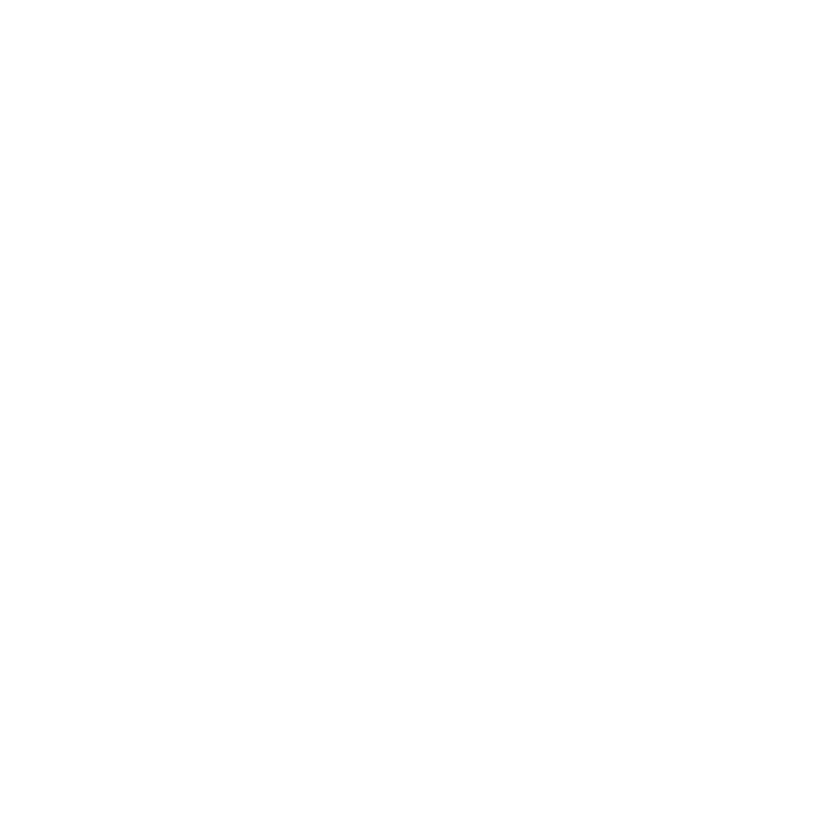

In [77]:
plot(mape_result_d,type="l",ylab="MAPE Values (Quantity)",xlab="Hours",main="MAPE Values for Hourly Model with Lasso Penalty")

In [ ]:
MAPE0d_reg_values=as.vector(abs(((hour0_test$consumption-predicts_hour0)/predicts_hour0)))
MAPE1d_reg_values=as.vector(abs(((hour1_test$consumption-predicts_hour1)/predicts_hour1)))
MAPE2d_reg_values=as.vector(abs(((hour2_test$consumption-predicts_hour2)/predicts_hour2)))
MAPE3d_reg_values=as.vector(abs(((hour3_test$consumption-predicts_hour3)/predicts_hour3)))
MAPE4d_reg_values=as.vector(abs(((hour4_test$consumption-predicts_hour4)/predicts_hour4)))
MAPE5d_reg_values=as.vector(abs(((hour5_test$consumption-predicts_hour5)/predicts_hour5)))
MAPE6d_reg_values=as.vector(abs(((hour6_test$consumption-predicts_hour6)/predicts_hour6)))
MAPE7d_reg_values=as.vector(abs(((hour7_test$consumption-predicts_hour7)/predicts_hour7)))
MAPE8d_reg_values=as.vector(abs(((hour8_test$consumption-predicts_hour8)/predicts_hour8)))
MAPE9d_reg_values=as.vector(abs(((hour9_test$consumption-predicts_hour9)/predicts_hour9)))
MAPE10d_reg_values=as.vector(abs(((hour10_test$consumption-predicts_hour10)/predicts_hour10)))
MAPE11d_reg_values=as.vector(abs(((hour11_test$consumption-predicts_hour11)/predicts_hour11)))
MAPE12d_reg_values=as.vector(abs(((hour12_test$consumption-predicts_hour12)/predicts_hour12)))
MAPE13d_reg_values=as.vector(abs(((hour13_test$consumption-predicts_hour13)/predicts_hour13)))
MAPE14d_reg_values=as.vector(abs(((hour14_test$consumption-predicts_hour14)/predicts_hour14)))
MAPE15d_reg_values=as.vector(abs(((hour15_test$consumption-predicts_hour15)/predicts_hour15)))
MAPE16d_reg_values=as.vector(abs(((hour16_test$consumption-predicts_hour16)/predicts_hour16)))
MAPE17d_reg_values=as.vector(abs(((hour17_test$consumption-predicts_hour17)/predicts_hour17)))
MAPE18d_reg_values=as.vector(abs(((hour18_test$consumption-predicts_hour18)/predicts_hour18)))
MAPE19d_reg_values=as.vector(abs(((hour19_test$consumption-predicts_hour19)/predicts_hour19)))
MAPE20d_reg_values=as.vector(abs(((hour20_test$consumption-predicts_hour20)/predicts_hour20)))
MAPE21d_reg_values=as.vector(abs(((hour21_test$consumption-predicts_hour21)/predicts_hour21)))
MAPE22d_reg_values=as.vector(abs(((hour22_test$consumption-predicts_hour22)/predicts_hour22)))
MAPE23d_reg_values=as.vector(abs(((hour23_test$consumption-predicts_hour23)/predicts_hour23)))


In [ ]:
D_all_val=c(MAPE0d_reg_values,MAPE1d_reg_values,MAPE2d_reg_values,MAPE3d_reg_values,MAPE4d_reg_values,MAPE5d_reg_values,
           MAPE6d_reg_values,MAPE7d_reg_values,MAPE8d_reg_values,MAPE9d_reg_values,MAPE10d_reg_values,MAPE11d_reg_values,
           MAPE12d_reg_values,MAPE13d_reg_values,MAPE14d_reg_values,MAPE15d_reg_values,MAPE16d_reg_values,MAPE17d_reg_values,
           MAPE18d_reg_values,MAPE19d_reg_values,MAPE20d_reg_values,MAPE21d_reg_values,MAPE22d_reg_values,MAPE23d_reg_values)

In [ ]:
lasso_dt=data.table(
                    date=unique(test$date),
                    hour_0=predicts_hour0,hour_1=predicts_hour1,hour_2=predicts_hour2,hour_3=predicts_hour3,
                    hour_4=predicts_hour4,hour_5=predicts_hour5,hour_6=predicts_hour6,hour_7=predicts_hour7,
                    hour_8=predicts_hour8,hour_9=predicts_hour9,hour_10=predicts_hour10,hour_11=predicts_hour11,
                    hour_12=predicts_hour12,hour_13=predicts_hour13,hour_14=predicts_hour14,hour_15=predicts_hour15,
                    hour_16=predicts_hour16,hour_17=predicts_hour17,hour_18=predicts_hour18,hour_19=predicts_hour19,
                    hour_20=predicts_hour20,hour_21=predicts_hour21,hour_22=predicts_hour22,hour_23=predicts_hour23)

In [ ]:
lasso_pred=reshape(lasso_dt, 
        direction = "long",
        varying = list(names(lasso_dt)[2:25]),
        v.names = "consumption",
        idvar = c("Date"),
        timevar = "hour",
        times = 0:23)

In [ ]:
lasso_pred=lasso_pred[order(date)]

### Overall Performance

In [ ]:
perf_dt("First Logistic Regression(daily)", test_daily$Consumption, first_pred_daily)
perf_dt("Lasso Regression", test$consumption, lasso_pred$consumption)

# Decision Trees-Daily

day_7                 day_2               weekday 
         5.442060e+12          1.768632e+12          1.206996e+12 
                 date                   T_2          reduced_temp 
         7.162190e+11          6.872759e+11          6.376223e+11 
                  T_3                   T_1                   T_7 
         5.516874e+11          4.651930e+11          3.958313e+11 
                  T_6                   T_5                   T_4 
         2.079442e+11          1.619954e+11          1.577877e+11 
sunlight_time_minutes        covid_severity 
         8.934243e+10          7.797157e+10

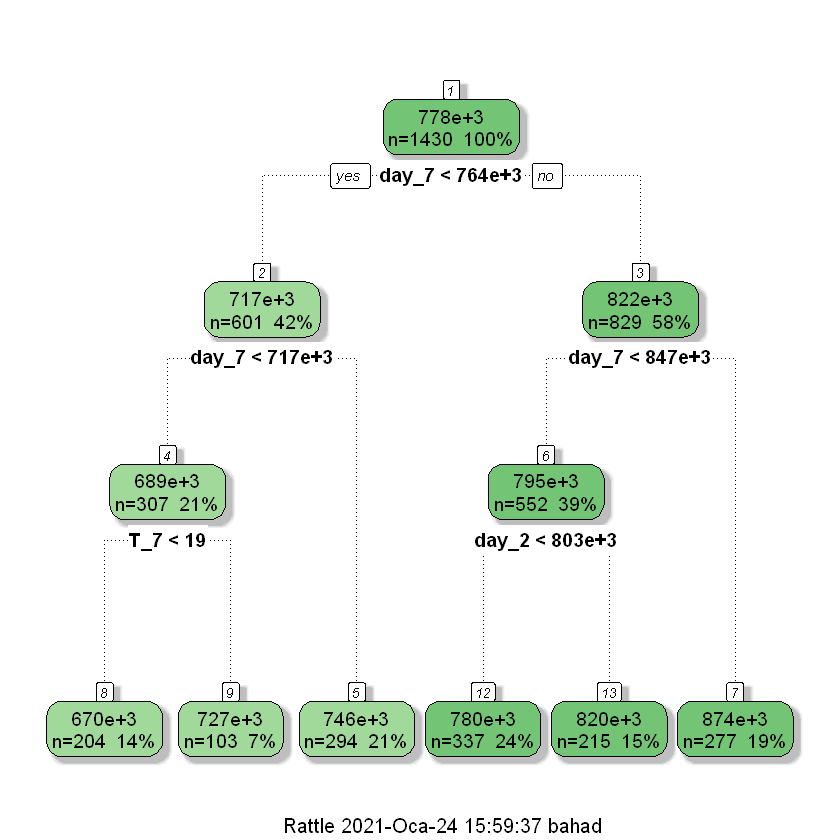

In [253]:
reg_tree_daily=rpart(Consumption~.,train_daily,method='anova',minbucket=100)
fancyRpartPlot(reg_tree_daily)
reg_tree_daily$variable.importance

In [254]:
PredictCART_daily=predict(reg_tree_daily,newdata=test_daily)

### Performanca Measure

In [255]:
perf_dt("Decision Tree-Daily",test_daily$Consumption,PredictCART_daily)

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree-Daily,38,839774.3,61167.81,-0.007851525,0.02863335,6843.236,22683.19,0.02701105


## Random Forest 

In [264]:
library(randomForest)

In [265]:
train_random_forest_daily=train_daily[8:.N]

In [314]:
random_forest_daily=randomForest(Consumption~.-date,data=train_random_forest_daily,
                           ntree=300,nodesize=30)
random_forest_daily


Call:
 randomForest(formula = Consumption ~ . - date, data = train_random_forest_daily,      ntree = 300, nodesize = 30) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 5

          Mean of squared residuals: 768322035
                    % Var explained: 88.73

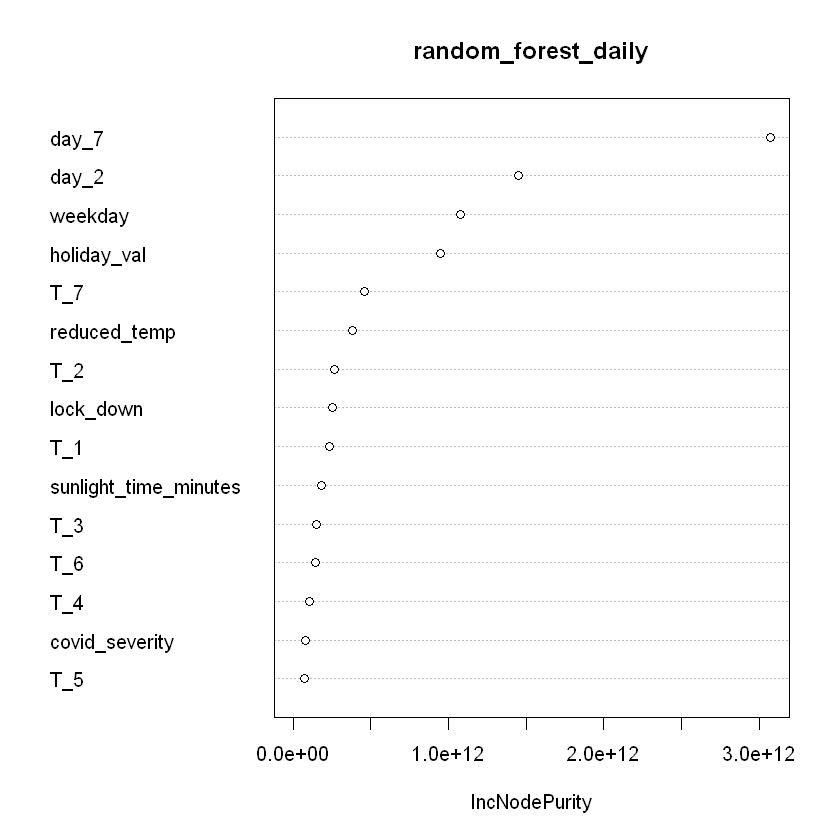

In [315]:
varImpPlot(random_forest_daily)

In [316]:
PredictRandomForest_daily=predict(random_forest_daily,newdata=test_daily)

### Performanca Measure

In [317]:
perf_dt("Decision Tree-daily",test_daily$Consumption,PredictCART_daily)
perf_dt("Random Forest-daily",test_daily$Consumption,PredictRandomForest_daily)

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree-daily,38,839774.3,61167.81,-0.007851525,0.02863335,6843.236,22683.19,0.02701105


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Random Forest-daily,38,839774.3,61167.81,0.02093843,0.03681139,5762.231,30286.1,0.03606457


# Decision Tree with Cross-Validation

In [318]:
library(caret)
library(e1071)

In [319]:
library(partykit)
library(psych)

In [320]:
set.seed(35)

In [321]:
numFolds=trainControl(method="cv",number = 10)
cpGrid=expand.grid(.cp=(0:50)*0.01)
tr=train(Consumption~.,
      data=train_random_forest_daily, 
      method="rpart",
      trControl=numFolds,
      tuneGrid= cpGrid)
tr

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

CART 

1423 samples
  16 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1281, 1281, 1281, 1282, 1280, 1280, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE     
  0.00  39694.19  0.7697801  25511.48
  0.01  43129.01  0.7245343  30088.64
  0.02  47589.49  0.6680903  33838.81
  0.03  50238.32  0.6301950  35686.09
  0.04  53004.09  0.5889117  37043.38
  0.05  56253.64  0.5374289  39207.05
  0.06  57728.58  0.5133642  40426.99
  0.07  57728.58  0.5133642  40426.99
  0.08  58217.77  0.5051484  40818.96
  0.09  58217.77  0.5051484  40818.96
  0.10  59014.79  0.4903262  41676.27
  0.11  59014.79  0.4903262  41676.27
  0.12  63681.44  0.4076128  47476.26
  0.13  64590.64  0.3904374  48536.39
  0.14  64590.64  0.3904374  48536.39
  0.15  64590.64  0.3904374  48536.39
  0.16  64590.64  0.3904374  48536.39
  0.17  64590.64  0.3904374  48536.39
  0.18  64590.64  0.3904374  48536.39
  0.19  64590.64  0.3904374  48536.

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

day_7                 day_2              weekday7 
         5.571306e+12          3.240438e+12          1.431114e+12 
         reduced_temp                  date                   T_2 
         9.752276e+11          9.408668e+11          8.579213e+11 
                  T_3                   T_1                   T_7 
         8.351067e+11          6.686891e+11          5.593172e+11 
           lock_down2                   T_4                   T_6 
         4.994903e+11          4.607397e+11          4.481365e+11 
         holiday_val3                   T_5              weekday6 
         4.355018e+11          4.208125e+11          1.412313e+11 
sunlight_time_minutes              weekday2        covid_severity 
         1.386395e+11          1.298917e+11          1.057330e+11 
             weekday5          holiday_val5              weekday3 
         2.602141e+10          1.585707e+10          1.230999e+10 
             weekday4 
         1.220370e+10

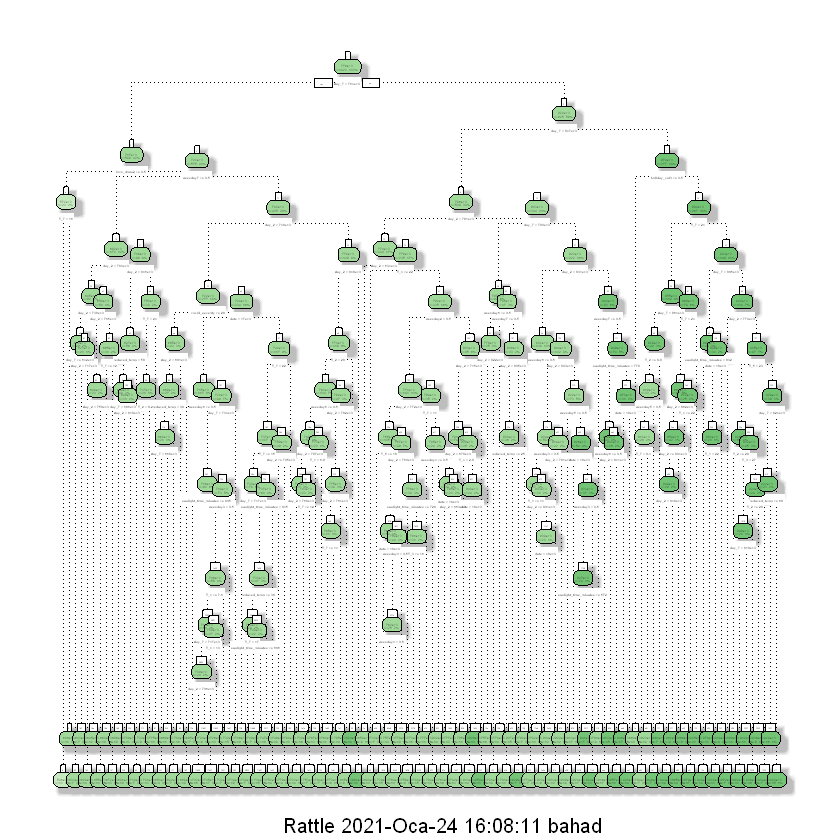

In [322]:
best_tree_daily=tr$finalModel
fancyRpartPlot(best_tree_daily)
best_tree_daily$variable.importance

In [323]:
# prediction_best_cv=predict(best_tree_daily,newdata=test_daily)

## LM Trees

In [324]:
str(train_random_forest_daily)

Classes 'data.table' and 'data.frame':	1423 obs. of  17 variables:
 $ date                 : Date, format: "2017-01-08" "2017-01-09" ...
 $ Consumption          : num  681312 784144 799767 788201 791501 ...
 $ T_1                  : num  0.626 -0.89 -3.681 -10.536 -5.705 ...
 $ T_2                  : num  9.24 7.69 9.23 7.46 5.86 ...
 $ T_3                  : num  11.356 -0.442 -1.23 0.55 2.06 ...
 $ T_4                  : num  -0.143 -1.149 -6.077 -11.417 -6.064 ...
 $ T_5                  : num  2.13 -3.34 -10.18 -11.08 -4.36 ...
 $ T_6                  : num  0.637 -0.898 -5.013 -8.258 -7.167 ...
 $ T_7                  : num  7.864 -2.76 -3.346 -0.902 2.461 ...
 $ reduced_temp         : num  11.93 -0.7 -7.73 -13.01 -4.95 ...
 $ holiday_val          : Factor w/ 8 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ weekday              : Factor w/ 7 levels "1","2","3","4",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ lock_down            : Factor w/ 2 levels "0","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ co

Linear model tree

Model formula:
Consumption ~ day_2 + day_7 + covid_severity + sunlight_time_minutes + 
    reduced_temp | year(date) + month(date) + wday(date) + holiday_val + 
    lock_down

Fitted party:
[1] root
|   [2] holiday_val in 1, 2, 3, 4, 5, 6: n = 63
|                 (Intercept)                 day_2                 day_7 
|                2.984456e+05          4.149715e-01          1.881235e-01 
|              covid_severity sunlight_time_minutes          reduced_temp 
|                1.142353e+02         -1.813157e+02          9.344524e+02 
|   [3] holiday_val in 0, 7
|   |   [4] wday(date) <= 1: n = 193
|   |                 (Intercept)                 day_2                 day_7 
|   |               54314.6436170             0.6416319             0.1621973 
|   |              covid_severity sunlight_time_minutes          reduced_temp 
|   |                -115.1964524            -4.5705108           356.5543479 
|   |   [5] wday(date) > 1
|   |   |   [6] wday(date)

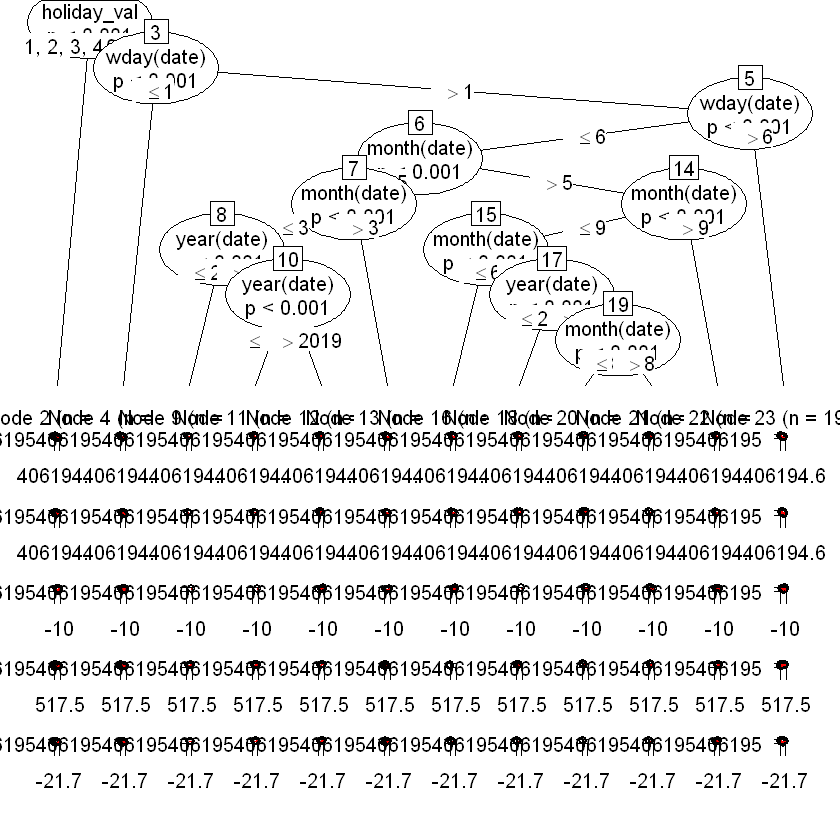

In [325]:
lm_tree_daily=lmtree(Consumption~day_2+day_7+covid_severity+sunlight_time_minutes+reduced_temp|year(date)+month(date)+wday(date)+holiday_val+lock_down,data=train_random_forest_daily,
                    alpha=0.01)
lm_tree_daily
plot(lm_tree_daily)

In [326]:
lm_prediction_daily=predict(lm_tree_daily,test_daily)

### Performanca Measure

In [327]:
perf_dt("Decision Tree-daily",test_daily$Consumption,PredictCART_daily)
perf_dt("Random Forest-daily",test_daily$Consumption,PredictRandomForest_daily)
perf_dt("LM Tree-daily",test_daily$Consumption,lm_prediction_daily)

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree-daily,38,839774.3,61167.81,-0.007851525,0.02863335,6843.236,22683.19,0.02701105


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Random Forest-daily,38,839774.3,61167.81,0.02093843,0.03681139,5762.231,30286.1,0.03606457


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
LM Tree-daily,38,839774.3,61167.81,0.001810539,0.02774718,5371.162,22496.62,0.02678889
